In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, RESOURCE_DIR

In [23]:
#df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
df = pd.read_excel('databases_keep_out.xlsx', keep_default_na=False)
#reads projects from Excel file

len(df)
df


,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [24]:
df3 = df.copy()
df3

,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [25]:
pd.options.plotting.backend = "plotly"


In [26]:
import plotly.express as px

In [27]:
import plotly.graph_objects as px

colors = {'Relational':'silver','NoSQL':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

Out X -> Filtra os BDs que saíram
$X -> Filtra os Bds que continuaram no ultimo slice apesar das remoçoes e reinserções
~Out X -> Filtra os BDs que não saíram.


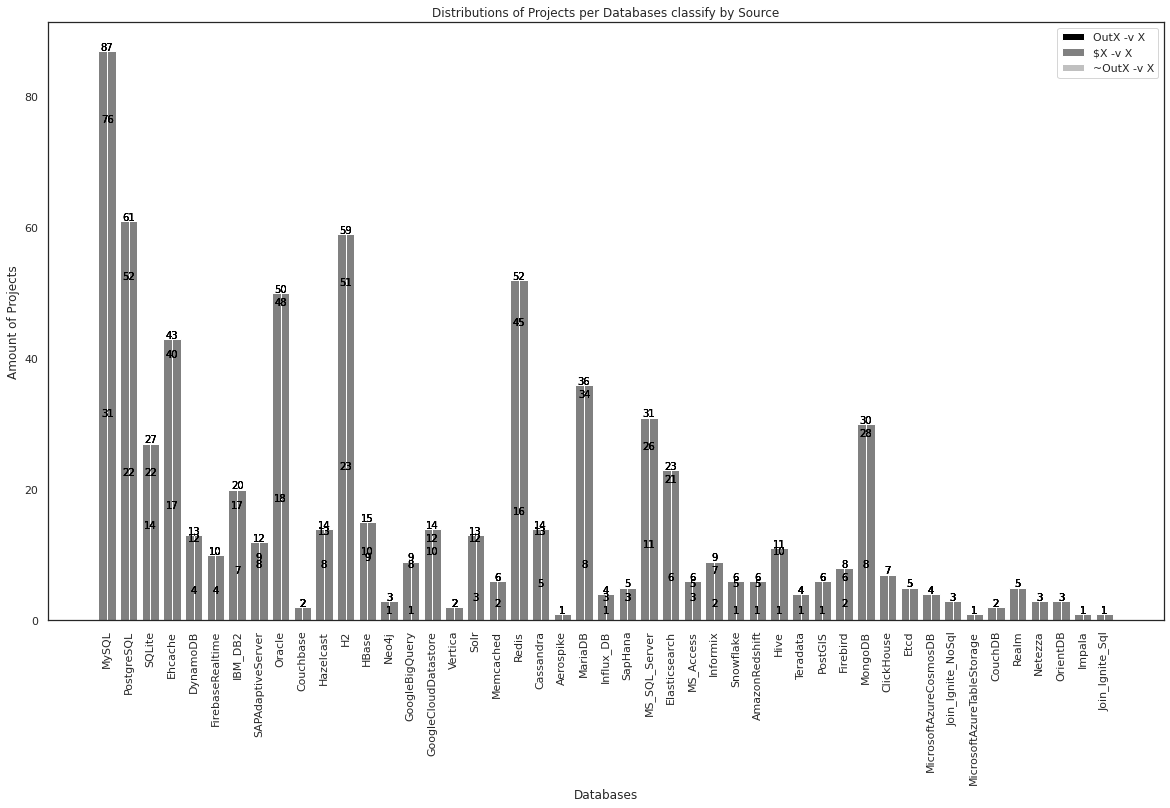

In [28]:
colors = {'OutX -v X':'black','$X -v X':'gray','~OutX -v X':'silver'}
c = df3['Source'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Lines'], color=c) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Lines'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified


plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Source')
ax.legend()
plt.xticks(rotation=90)

#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

Out X -> Filtra os BDs que saíram
$X -> Filtra os Bds que continuaram no ultimo slice apesar das remoçoes e reinserções
~Out X -> Filtra os BDs que não saíram.

In [29]:
df4 = df.copy()
df4.rename(columns={'Lines': 'Amount of Projects'}, inplace=True)
df4
#precisei fazer outro dataframe pra ajustar a legenda em y
import plotly.express as px

# Define custom color sequence
colors = ["black", "gray", "silver"]

fig = px.bar(df4, x="Databases", y="Amount of Projects", color="Source", text_auto=True, color_discrete_sequence=colors)
fig.update_layout( title_x=0.3, height =1000, width =1500, bargap = 0.09)#title_text='Distributions of Projects per Databases classify by Source',
fig.show()

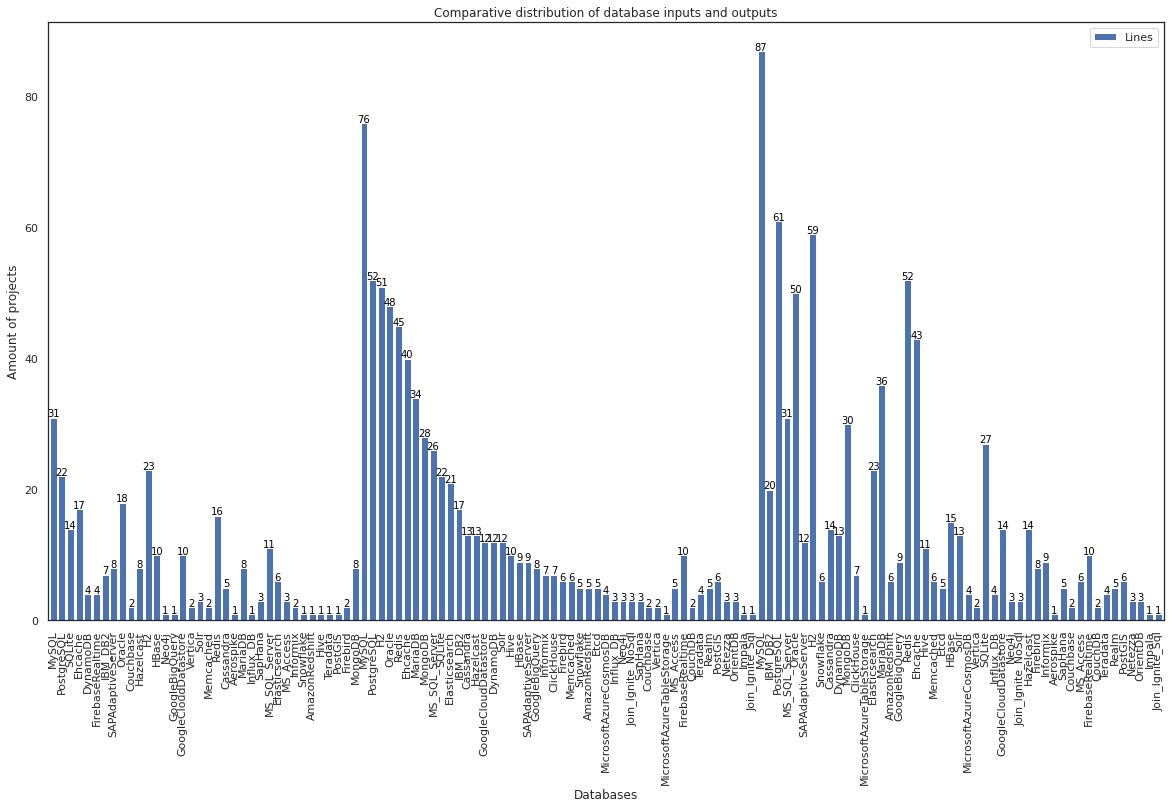

In [28]:
#df4=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
colors = ["black", "gray", "silver"]
plot = df4.plot(x="Databases", y=["Lines","Source"], kind="bar", width=0.8, figsize=(20,11), 
     title = 'Comparative distribution of database inputs and outputs')
plt.xlabel('Databases')
plt.ylabel('Amount of projects')
#plt.xticks('Databases', rotation=90)

#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [30]:
df4['Source'].replace({'OutX -v X':'Removed'}, regex=True, inplace=True)
#df4['Source'].replace({'Removed': 'Kept'}, regex=True, inplace=True)
df4

,Databases,Source,Amount of Projects
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [31]:
#df5 = df.copy()
df5 = df4.query("Source != '$X -v X'")
df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)
df5

/home/raquelmax/.virtualenvs/db-mining-pBhgzAM8/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Databases,Source,Amount of Projects
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


/home/raquelmax/.virtualenvs/db-mining-pBhgzAM8/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




AttributeError: 'AxesSubplot' object has no attribute 'get_height'

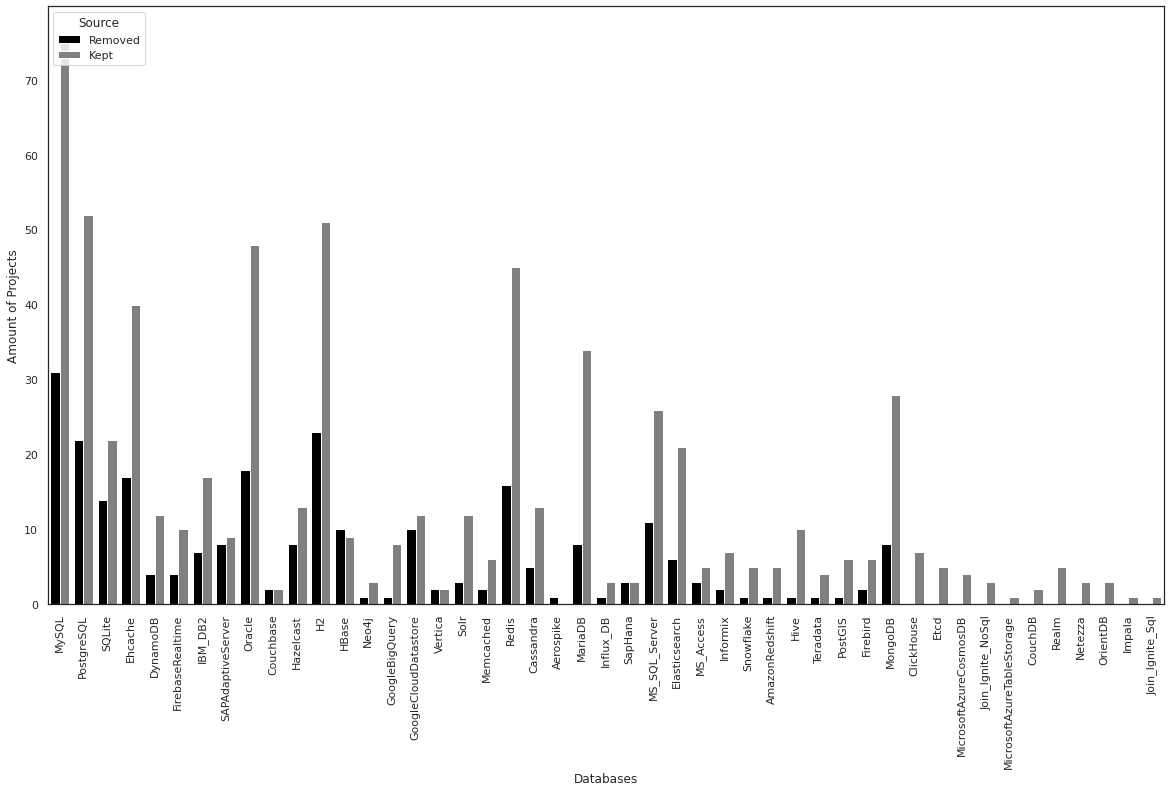

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
plt.figure(figsize=(20, 11))
#fig, ax = plt.subplots(figsize=(20,11))
sns.set(style='white')

#create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Source', data=df5, palette=["black", "gray"], ci=None) 
#plt.title('Distribution ', fontsize=16)

#add axis titles
plt.xlabel('Databases')
plt.ylabel('Amount of Projects')

#rotate x-axis labels
plt.xticks(rotation=90)
#show_values(p)
value = '{:.1f}'.format(p.get_height())

#ax.bar_label(ax.containers[0])



In [33]:
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5 = df5.groupby(['Databases','Legend']).mean().sort_values(['Amount of Projects',], ascending=[False])
df5


,Databases,Source,Amount of Projects
36,MySQL,Kept,76
37,PostgreSQL,Kept,52
38,H2,Kept,51
39,Oracle,Kept,48
40,Redis,Kept,45
...,...,...,...
14,GoogleBigQuery,Removed,1
33,PostGIS,Removed,1
32,Teradata,Removed,1
31,Hive,Removed,1


In [16]:
df5 = df4.query("Source == '$X -v X'")
df5

,Databases,Source,Amount of Projects
82,MySQL,$X -v X,87
83,IBM_DB2,$X -v X,20
84,PostgreSQL,$X -v X,61
85,MS_SQL_Server,$X -v X,31
86,Oracle,$X -v X,50
87,SAPAdaptiveServer,$X -v X,12
88,H2,$X -v X,59
89,Snowflake,$X -v X,6
90,Cassandra,$X -v X,14
91,DynamoDB,$X -v X,13


Fred favor mexer no código abaixo

In [34]:
#df4 = df.copy()
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5
#precisei fazer outro dataframe pra ajustar a legenda em y
import plotly.express as px

# Define custom color sequence
colors = ["silver","gray"]

fig = px.bar(df5, x="Databases", y="Amount of Projects", color="Legend", text_auto=True, color_discrete_sequence=colors, barmode='group') #.sort_values(['Amount of Projects'], ascending=[True])
fig.update_layout( title_x=0.3, height =1000, width =2000, bargap = 0.09, title_text='Comparative distribution removed and kept in databases')
#fig.xticks(rotation=90)
fig.show()

ClickHouse (7), Etcd (5), Realm (5), MicrosoftAzureCosmosDB (4), Ignite_NoSQL (3), Netezza (3), OrientDB (3), CouchDB (2), Impala (1), MicrosoftAzureTavleStorage (1), Ignite_SQL (1).

In [35]:
#df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df6 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5
#precisei fazer outro dataframe pra ajustar a legenda em y
import plotly.express as px

# Define custom color sequence
colors = ["gray"]

fig = px.bar(df6, x="Databases", y="Amount of Projects", text_auto=True, color_discrete_sequence=colors) #.sort_values(['Amount of Projects'], ascending=[True])
fig.update_layout( title_x=0.3, height =1000, width =1200, bargap = 0.09, title_text='Distribution of the kept of the databases in the last slice')
#fig.xticks(rotation=90)
fig.show()

In [36]:
df5['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


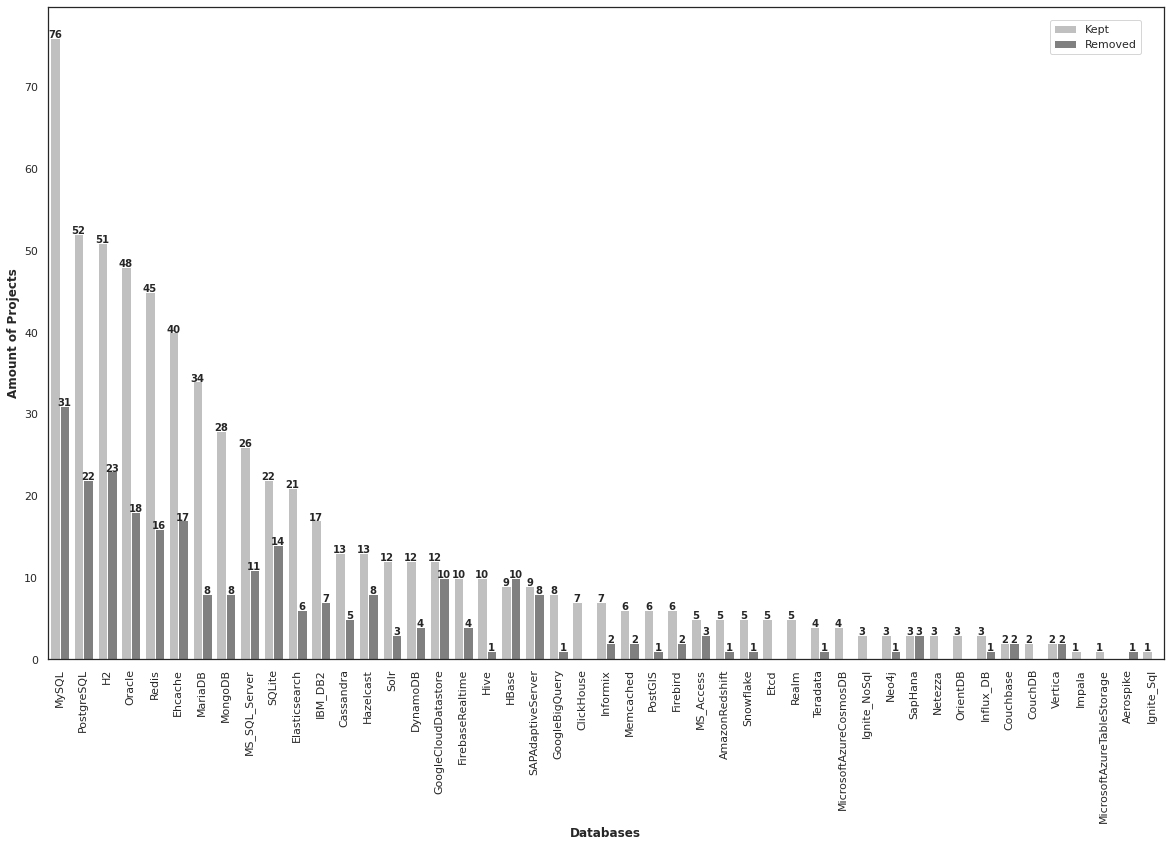

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

# show plot
plt.show()

df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5
#precisei fazer outro dataframe pra ajustar a legenda em y
import plotly.express as px

# Define custom color sequence
colors = ["silver","gray"]

fig = px.bar(df5, x="Databases", y="Amount of Projects", color="Legend", text_auto=True, color_discrete_sequence=colors, barmode='group') #.sort_values(['Amount of Projects'], ascending=[True])
fig.update_layout( title_x=0.3, height =1000, width =2000, bargap = 0.09, title_text='Comparative distribution of exits and stays of databases')
#fig.xticks(rotation=90)
fig.show()